### 汽车销售行业偷漏税行为识别
#### 简介
>##### 汽车销售行业，通常是指销售汽车整车的行业。该行业在税收上存在少开发票金额、少计收入，上牌、按揭、保险等一条龙服务未入账，不及时确认保修索赔款等多种情况，导致政府损失大量税收。汽车销售企业的部分经营指标能在一定程度上评估企业的偷漏税倾向。  
>##### 在这个项目中，我们需要通过汽车销售企业的部分经营指标，建立偷漏税行为识别模型。

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
plt.rcParams['font.sans-serif'] = ['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False #用来正常显示负号

df = pd.read_excel(u'汽车销售企业经营指标.xls',encoding = 'gbk')
df.head(4)

,纳税人编号,销售类型,销售模式,汽车销售平均毛利,维修毛利,企业维修收入占销售收入比重,增值税税负,存货周转率,成本费用利润率,整体理论税负,整体税负控制数,办牌率,单台办牌手续费收入,代办保险率,保费返还率,输出
0,1,国产轿车,4S店,0.0635,0.3241,0.0879,0.0084,8.5241,0.0018,0.0166,0.0147,0.4000,0.02,0.7155,0.1500,正常
1,2,国产轿车,4S店,0.0520,0.2577,0.1394,0.0298,5.2782,-0.0013,0.0032,0.0137,0.3307,0.02,0.2697,0.1367,正常
2,3,国产轿车,4S店,0.0173,0.1965,0.1025,0.0067,19.8356,0.0014,0.0080,0.0061,0.2256,0.02,0.2445,0.1301,正常
3,4,国产轿车,一级代理商,0.0501,0.0000,0.0000,0.0000,1.0673,-0.3596,-0.1673,0.0000,0.0000,0.00,0.0000,0.0000,异常


>##### 可以看到我们的数据集有16列，其中'销售类型','销售模式','输出'是需要创建虚拟变量的。

In [2]:
print('数据集（行，列）：',df.shape)
print('空值数量：',df.isnull().sum().sum())
print('重复的数据行：',df[df.duplicated() == True])

数据集（行，列）： (124, 16)
空值数量： 0
重复的数据行： Empty DataFrame
Columns: [纳税人编号, 销售类型, 销售模式, 汽车销售平均毛利, 维修毛利, 企业维修收入占销售收入比重, 增值税税负, 存货周转率, 成本费用利润率, 整体理论税负, 整体税负控制数, 办牌率, 单台办牌手续费收入, 代办保险率, 保费返还率, 输出]
Index: []


>##### 可以看到数据集数据量不多，没有空值没有重复行，所以不做过多处理。

In [3]:
df_type = pd.get_dummies(df[u'销售类型'], prefix='type')
df_model =  pd.get_dummies(df[u'销售模式'] , prefix='model')
df_input = pd.get_dummies(df[u'输出'])
df = pd.concat([df, df_type, df_model, df_input], axis=1)
df.columns
df.head(1)

,纳税人编号,销售类型,销售模式,汽车销售平均毛利,维修毛利,企业维修收入占销售收入比重,增值税税负,存货周转率,成本费用利润率,整体理论税负,...,type_工程车,type_微型面包车,type_进口轿车,model_4S店,model_一级代理商,model_二级及二级以下代理商,model_其它,model_多品牌经营店,异常,正常
0,1,国产轿车,4S店,0.0635,0.3241,0.0879,0.0084,8.5241,0.0018,0.0166,...,0,0,0,1,0,0,0,0,0,1


>##### 将'销售类型','销售模式','输出'三列创建虚拟变量。

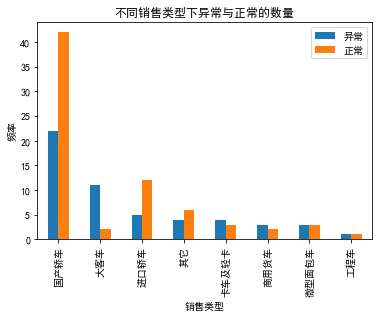

In [4]:
# 初步分析不同销售类型的异常数量
df_type1 = df.groupby([u'销售类型'])[u'异常'].sum()
df_type2 = df.groupby([u'销售类型'])[u'正常'].sum()
df_type12 = pd.concat([df_type1,df_type2],axis=1)
# 直方图按照异常出现的次数降序显示
df_type12.sort_values(u'异常',ascending=False).plot(kind='bar');
plt.title(u'不同销售类型下异常与正常的数量');
plt.xlabel('销售类型')
plt.ylabel('频率')
plt.show()

>##### 从上图可以看出国产轿车和大客车的异常频率较大，其中大客车的异常比它本身的正常还有多很多，大客车需要重点关注。

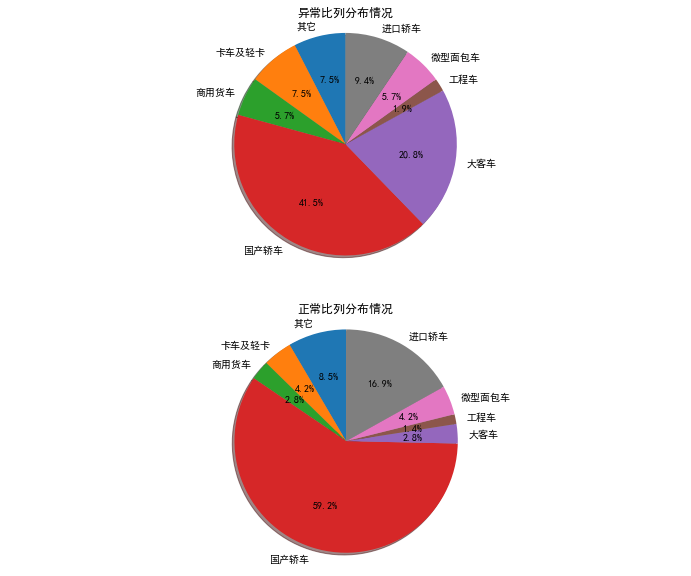

In [5]:
# 计算每种销售类型异常和正常所占比列，并添加到新的列中。
df_type12[u'异常比列'] = df_type12[u'异常'] / df_type12[u'异常'].sum()
df_type12[u'正常比列'] = df_type12[u'正常'] / df_type12[u'正常'].sum()
# 用饼图进行可视化
fig = plt.figure(figsize=(12,10))
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)
ax1.pie(df_type12[u'异常比列'] , labels = df_type12.index, autopct='%1.1f%%',shadow=True, startangle=90);
ax1.set_title(u'异常比列分布情况')
ax1.axis('equal')  # 圆形显示
ax2.pie(df_type12[u'正常比列'] , labels = df_type12.index, autopct='%1.1f%%',shadow=True, startangle=90);
ax2.axis('equal')
ax2.set_title(u'正常比列分布情况')
plt.show()

>##### 创建饼图作为条形图的补充，主要观察异常的比例分布情况。

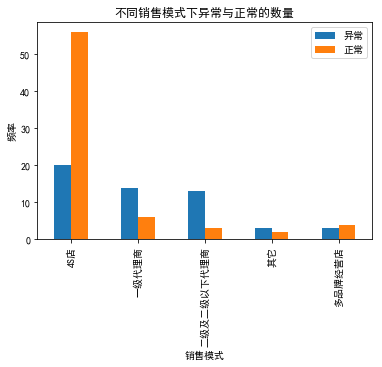

In [6]:
# 同理可视化不同'销售模式'下的异常情况。
df_model1 = df.groupby([u'销售模式'])[u'异常'].sum()
df_model2 = df.groupby([u'销售模式'])[u'正常'].sum()
df_model12 = pd.concat([df_model1,df_model2],axis=1)
df_model12.sort_values(u'异常',ascending=False).plot(kind='bar');
plt.title(u'不同销售模式下异常与正常的数量');
plt.xlabel('销售模式')
plt.ylabel('频率')
plt.show()

>##### 代理商值得关注。

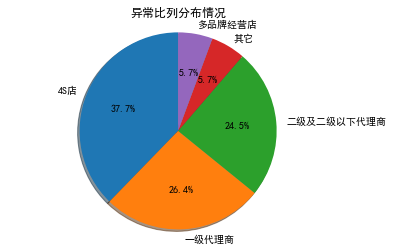

In [7]:
# 计算每种销售模式异常所占比列，并添加到新的列中。
df_model12[u'异常比列'] = df_model12[u'异常'] / df_model12[u'异常'].sum()
# 用饼图进行可视化
plt.pie(df_model12[u'异常比列'] , labels = df_model12.index, autopct='%1.1f%%',shadow=True, startangle=90);
plt.title(u'异常比列分布情况')
plt.axis('equal')  # 圆形显示
plt.show()

In [8]:
# 初步试探分析完后我们把不需要的列删除。
df.drop(columns = [u'纳税人编号', u'销售类型', u'销售模式', u'输出', u'正常'], inplace=True)
# 提取列标签，用于划分因变量和自变量。
df_col = np.array(df.columns)
# 把数据集划分成90%的训练集，10%的测试集。
from sklearn.model_selection import train_test_split

x = df[df_col[:-1]]
y = df[df_col[-1]]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state=0)

#### 现在可以开始构建模型
>##### *选择构建什么模型非常重要，对于初学者来说可以多尝试几种算法模型，然后比较选出最合适的。当然即使这样也并不能保证最后的模型就是最好的，因为每个模型还有参数的调整。*

#### 一下我们来做一个实验，建立朴素贝叶斯和SVM模型，查看准确率。

In [9]:
# 导入朴素贝叶斯函数
from sklearn.naive_bayes import GaussianNB
# 创建分类器，并训练分类器
clf = GaussianNB().fit(x_train, y_train)
# 查看分类器的准确率
clf.score(x_test, y_test)

0.6923076923076923

In [10]:
from sklearn import svm
from sklearn.metrics import accuracy_score
# 创建SVM分类器，训练分类器，并测试分类器准确率
clf = svm.SVC(kernel='linear').fit(x_train, y_train)
pred = clf.predict(x_test)
accuracy_score(pred, y_test)

0.6923076923076923

>##### 我们可以看到两个模型的准确率都是69.2%，对于这个结果是偏低的，所以应该考虑其他模型。针对本次项目数据的特点，我认为逻辑回归和CART决策树模型可能会更合适，下面我们来验证一下。

### 构建逻辑回归模型

D:\Anaconda3531\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


逻辑回归模型分类器的准确率为： 0.7692307692307693


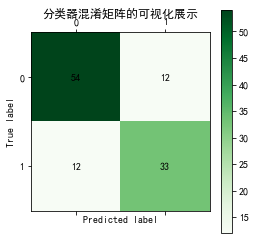

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
# 尝试了几次参数调整，没有得到更好的准确率，如果您通过调整参数得到了更高的准确率，希望能与我分享。
log = LogisticRegression(C=1.0,penalty='l1').fit(x_train, y_train)
print('逻辑回归模型分类器的准确率为：',accuracy_score(y_test, log.predict(x_test)))

def cm_plt(pred):
    conf_mat = confusion_matrix(y_train, pred) # conf_mat为分类情况的混淆矩阵
    plt.matshow(conf_mat, cmap=plt.cm.Greens)
    plt.colorbar()

    for x in range(len(conf_mat)):
        for y in range(len(conf_mat)):
            plt.annotate(conf_mat[x,y], xy=(x, y), horizontalalignment='center', verticalalignment='center')
        
    plt.title(u'分类器混淆矩阵的可视化展示')
    plt.ylabel('True label');
    plt.xlabel('Predicted label');
# 对逻辑回归模型的混淆矩阵进行可视化展示
cm_plt(log.predict(x_train))

>##### 本次构建的模型准确率有76.9%，较之前的有所提高，但是还不够，我决定继续构建模型，希望能找到更高准确率的模型。

### 构建CART决策树模型

CART决策树模型分类器的准确率为： 0.6923076923076923


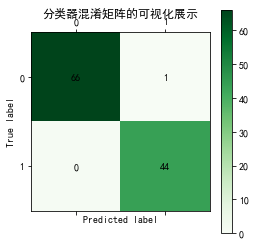

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

tree = DecisionTreeClassifier().fit(x_train, y_train)
print('CART决策树模型分类器的准确率为：',accuracy_score(y_test, tree.predict(x_test)))

# 对决策树训练集混淆矩阵进行可视化展示
cm_plt(tree.predict(x_train))

>##### 决策树模型准确率也和SVM一样。

### 构建LM神经网络模型

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


D:\Anaconda3531\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=25, units=10)`
  """
D:\Anaconda3531\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=10, units=1)`
  import sys
D:\Anaconda3531\lib\site-packages\ipykernel_launcher.py:11: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  # This is added back by InteractiveShellApp.init_path()


Epoch 1/100
111/111 [==============================] - 1s 8ms/step - loss: 1.3015 - acc: 0.6306
Epoch 2/100
111/111 [==============================] - 0s 2ms/step - loss: 1.1033 - acc: 0.6667
Epoch 3/100
111/111 [==============================] - 0s 2ms/step - loss: 0.9061 - acc: 0.6757
Epoch 4/100
111/111 [==============================] - 0s 3ms/step - loss: 0.7708 - acc: 0.6847
Epoch 5/100
111/111 [==============================] - 0s 3ms/step - loss: 0.7067 - acc: 0.7117
Epoch 6/100
111/111 [==============================] - 0s 3ms/step - loss: 0.6650 - acc: 0.7297
Epoch 7/100
111/111 [==============================] - 0s 3ms/step - loss: 0.6281 - acc: 0.7027
Epoch 8/100
111/111 [==============================] - 0s 3ms/step - loss: 0.6002 - acc: 0.7207
Epoch 9/100
111/111 [==============================] - 0s 2ms/step - loss: 0.5769 - acc: 0.7387
Epoch 10/100
111/111 [==============================] - 0s 1ms/step - loss: 0.5538 - acc: 0.7477
Epoch 11/100
111/111 [=================

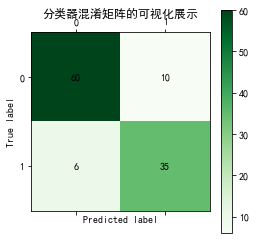

In [13]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation
# 建立神经网络
net = Sequential()
net.add(Dense(input_dim=25,output_dim=10))  # 添加输入层（3节点）到隐藏层（10节点）的连接
net.add(Activation('relu'))  # 隐藏层使用relu激活函数
net.add(Dense(input_dim=10,output_dim=1))   # 添加隐藏层到输出层的连接
net.add(Activation('sigmoid'))  # 输出层使用sigmoid激活函数
net.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])  # 编译模型，使用adam方法求解

net.fit(x_train, y_train, nb_epoch=100, batch_size=1)

cm_plt(net.predict_classes(x_train).reshape(len(x_train)))

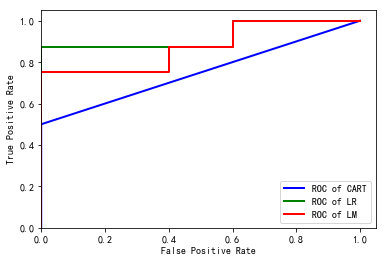

In [14]:
#三个模型的roc曲线
from sklearn.metrics import roc_curve
fig,ax=plt.subplots()
fpr, tpr, thresholds = roc_curve(y_test, tree.predict_proba(x_test)[:,1], pos_label=1)
fpr2, tpr2, thresholds2 = roc_curve(y_test, log.predict_proba(x_test)[:,1], pos_label=1)
fpr3, tpr3, thresholds3 = roc_curve(y_test, net.predict(x_test).reshape(len(x_test)), pos_label=1)

plt.plot(fpr, tpr, linewidth=2, label = 'ROC of CART', color = 'blue') #作出ROC曲线
plt.plot(fpr2, tpr2, linewidth=2, label = 'ROC of LR', color = 'green') #作出ROC曲线
plt.plot(fpr3, tpr3, linewidth=2, label = 'ROC of LM', color = 'red') #作出ROC曲线

plt.xlabel('False Positive Rate') #坐标轴标签
plt.ylabel('True Positive Rate') #坐标轴标签
plt.ylim(0,1.05) #边界范围
plt.xlim(0,1.05) #边界范围
plt.legend(loc=4) #图例
plt.show() #显示作图结果

>##### 经对比发现，LR逻辑回归的ROC曲线比其他模型的ROC曲线更加靠近单位方形的左上角，LR逻辑回归的ROC曲线下的面积更大，说明LR逻辑回归模型的分类性能较好。

### 结论
>1、经过以上分析，我们发现4s店和代理商偷漏税的可能性较大，大客车和轿车是主要偷漏税车型。  
>2、通过构建几种模型，最后得出逻辑回归模型对识别偷漏税的情况准确率最高，达到76.9%，是此次分析建议采用的模型。  
>3、以上结论只限于对本次数据集的分析结果。因为本次分析数据集数量太少，对于构建的模型准确率影响很大，如果想要得到更好的识别模型，建议采集更多的数据。